In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('US_Humidity.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Relative Humidity
Date,,
2020-03-01,20,48.894765
2020-03-02,14,64.492068
2020-03-03,22,48.064374
2020-03-04,34,43.923706
2020-03-05,74,35.402780


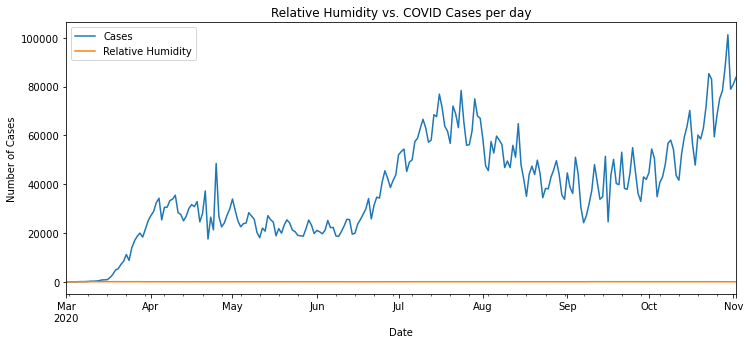

In [5]:
title = 'Relative Humidity vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Relative Humidity'].plot(legend=True);

In [6]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.238645
p-value                   0.656755
# lags used              13.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
adf_test(df['Relative Humidity'], title='Humidity')

Augmented Dickey-Fuller Test: Humidity
ADF test statistic       -4.866072
p-value                   0.000041
# lags used               2.000000
# observations          244.000000
critical value (1%)      -3.457438
critical value (5%)      -2.873459
critical value (10%)     -2.573122
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
df_transformed = df.diff()

In [10]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Relative Humidity'], title='HumidityFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.772410
p-value                   0.062324
# lags used              12.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: HumidityFirstDiff
ADF test statistic     -6.082351e+00
p-value                 1.084589e-07
# lags used             1.000000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [11]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Relative Humidity'], title='HumiditySecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -6.486413e+00
p-value                 1.257669e-08
# lags used             1.100000e+01
# observations          2.330000e+02
critical value (1%)    -3.458731e+00
critical value (5%)    -2.874026e+00
critical value (10%)   -2.573424e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: HumiditySecondDiff
ADF test statistic     -8.589875e+00
p-value                 7.335197e-14
# lags used             1.200000e+01
# observations          2.320000e+02
critical value (1%)    -3.458855e+00
critical value (5%)    -2.874080e+00
critical value (10%)   -2.573453e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [13]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  23.922770719799768
BIC:  23.95194946495667

Order = 1
AIC:  23.417991683973494
BIC:  23.505790674888306

Order = 2
AIC:  23.13728671483443
BIC:  23.284059248945685

Order = 3
AIC:  22.957396970437102
BIC:  23.16349993723718

Order = 4
AIC:  22.876743581873395
BIC:  23.14253751382399

Order = 5
AIC:  22.755798847078665
BIC:  23.081647971449677

Order = 6
AIC:  22.4558250049555
BIC:  22.842097296607758

Order = 7
AIC:  22.080588865610217
BIC:  22.52765610074292

Order = 8
AIC:  22.002250053579857
BIC:  22.510487864464153

Order = 9
AIC:  21.885336561939432
BIC:  22.455124492660225

Order = 10
AIC:  21.817277907868256
BIC:  22.448999471096705

Order = 11
AIC:  21.78008336300466
BIC:  22.47412609782468

Order = 12
AIC:  21.75439736754025
BIC:  22.5111528983527

Order = 13
AIC:  21.76512103759169
BIC:  22.58498513412075

Order = 14
AIC:  21.798668207186726
BIC:  22.68204084561348

Order = 15
AIC:  21.82197933932026
BIC:  22.76926476456926

Order = 16
AIC:  21.845880341137853

In [14]:
results = model.fit(12)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Nov, 2020
Time:                     23:41:08
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.5112
Nobs:                     226.000    HQIC:                   22.0598
Log likelihood:          -3049.61    FPE:                2.80934e+09
AIC:                      21.7544    Det(Omega_mle):     2.27758e+09
--------------------------------------------------------------------
Results for equation Cases
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                       127.776905       347.253275            0.368           0.713
L1.Cases                     -1.624275         0.069659          -23.318           0.000
L1.Relative Humidity        

In [15]:
lag_order = results.k_ar
lag_order

12

In [16]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[-3.16649874e+03,  1.21751786e+01],
       [ 3.43529887e+02,  3.88323571e+00],
       [ 2.04905566e+03, -1.27908375e+01],
       [ 1.56840495e+03,  6.41961377e+00],
       [-1.81872088e+04, -3.51845351e+00],
       [-6.90610854e+02, -8.54499250e-01],
       [ 1.13503469e+04, -9.12694226e+00]])

In [17]:
test

,Cases,Relative Humidity
Date,,
2020-10-27,-2149.0,-6.880102
2020-10-28,-3528.0,3.271826
2020-10-29,6517.0,11.389285
2020-10-30,3384.0,-12.761246
2020-10-31,-35482.0,3.136690
2020-11-01,24406.0,0.942241
2020-11-02,815.0,-0.635564


In [18]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Humidity2d'])
df_forecast

,Cases2d,Humidity2d
2020-10-27,-3166.498737,12.175179
2020-10-28,343.529887,3.883236
2020-10-29,2049.055655,-12.790838
2020-10-30,1568.404951,6.419614
2020-10-31,-18187.208755,-3.518454
2020-11-01,-690.610854,-0.854499
2020-11-02,11350.346918,-9.126942


In [19]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [20]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Humidity1d'] = (df['Relative Humidity'].iloc[-nobs-1]-df['Relative Humidity'].iloc[-nobs-2]) + df_forecast['Humidity2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['HumidityForecast'] = df['Relative Humidity'].iloc[-nobs-1] + df_forecast['Humidity1d'].cumsum()

In [21]:
df_forecast

,Cases2d,Humidity2d,Cases1d,CasesForecast,Humidity1d,HumidityForecast
2020-10-27,-3166.498737,12.175179,5752.501263,74111.501263,9.219422,83.058748
2020-10-28,343.529887,3.883236,6096.031149,80207.532412,13.102657,96.161405
2020-10-29,2049.055655,-12.790838,8145.086804,88352.619216,0.311820,96.473225
2020-10-30,1568.404951,6.419614,9713.491756,98066.110972,6.731434,103.204658
2020-10-31,-18187.208755,-3.518454,-8473.717000,89592.393972,3.212980,106.417638
2020-11-01,-690.610854,-0.854499,-9164.327854,80428.066118,2.358481,108.776119
2020-11-02,11350.346918,-9.126942,2186.019064,82614.085182,-6.768461,102.007658


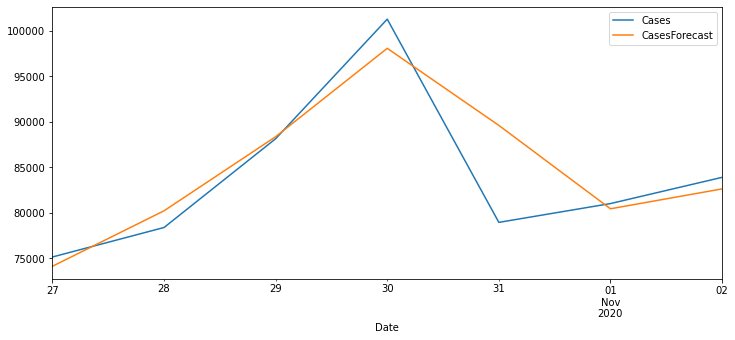

In [22]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);